# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#estoy guardando mi dataframe en data ../ para ir atras una carpeta
df.to_csv("../data/raw/df_airbnb_NY.csv", index=False)


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#revisar duplicados
print(df["name"].duplicated().sum())
print(df["host_id"].duplicated().sum())
print(df["id"].duplicated().sum())

989
11438
0


In [9]:
df[df["name"].duplicated()].sort_values("name")
#hay nombres muy genericos y varios nan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34352,27237625,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75459,-73.96707,Entire home/apt,737,3,3,2019-06-10,0.44,49,153
42817,33241978,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76391,-73.98071,Private room,250,1,0,NaN,NaN,8,0
9250,7071657,1 BR UPPER EAST SIDE,4909308,Francesco,Manhattan,Upper East Side,40.77344,-73.95035,Entire home/apt,243,1,26,2019-06-22,1.10,1,149
37235,29587811,1 Bedroom in Williamsburg,162504107,Lucile,Brooklyn,Williamsburg,40.71526,-73.94987,Private room,90,2,2,2019-05-19,0.33,1,193
32000,24976971,1 bedroom apartment on Columbus Avenue,76104209,Rated,Manhattan,Upper West Side,40.79360,-73.96642,Entire home/apt,180,30,0,NaN,NaN,33,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
16071,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130,1,0,NaN,NaN,1,365
18047,14135050,NaN,85288337,Jeff,Brooklyn,Bedford-Stuyvesant,40.69421,-73.93234,Private room,70,3,0,NaN,NaN,1,0


In [11]:
#eliminar informacion irrelevante, que no me entrega valor predictor, como identificadores

df.drop(["id", "name", "host_id", "last_review", "reviews_per_month"], axis=1, inplace=True)
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


<Axes: xlabel='availability_365', ylabel='Count'>

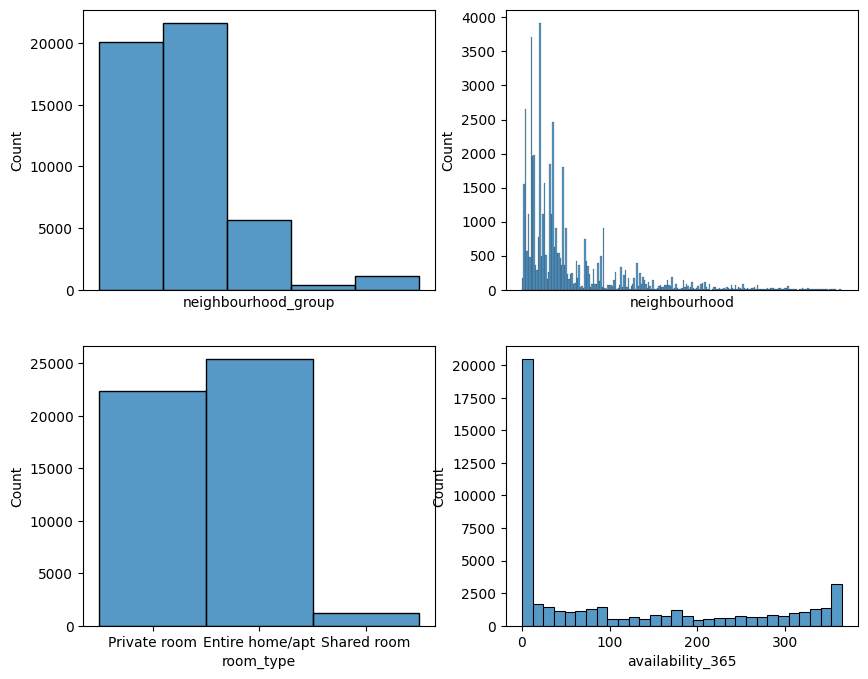

In [14]:
#analisis de variables univariantes
import matplotlib.pyplot as plt
import seaborn as sns

# comenzamos con las categoricas
# subplot hago una figura y eje y decirle a matplotlib que me de una grilla de graficos
# hay 5 variables categoricas ahora en nuestro df
# deben ser numeros pares
# primero numero de columnas, luego de filas, luego de que tamaño quiero los graficos.
fig, axis = plt.subplots(2,2, figsize=(10,8))
#ax es el axis que recibimos de arriba y le damos la posicion
#luego le damos la data que es el df y luego la x que es neighbourhood group
sns.histplot(ax=axis[0,0],data=df, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0,1],data=df, x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[1,0],data=df, x="room_type")
sns.histplot(ax=axis[1,1],data=df, x="availability_365")

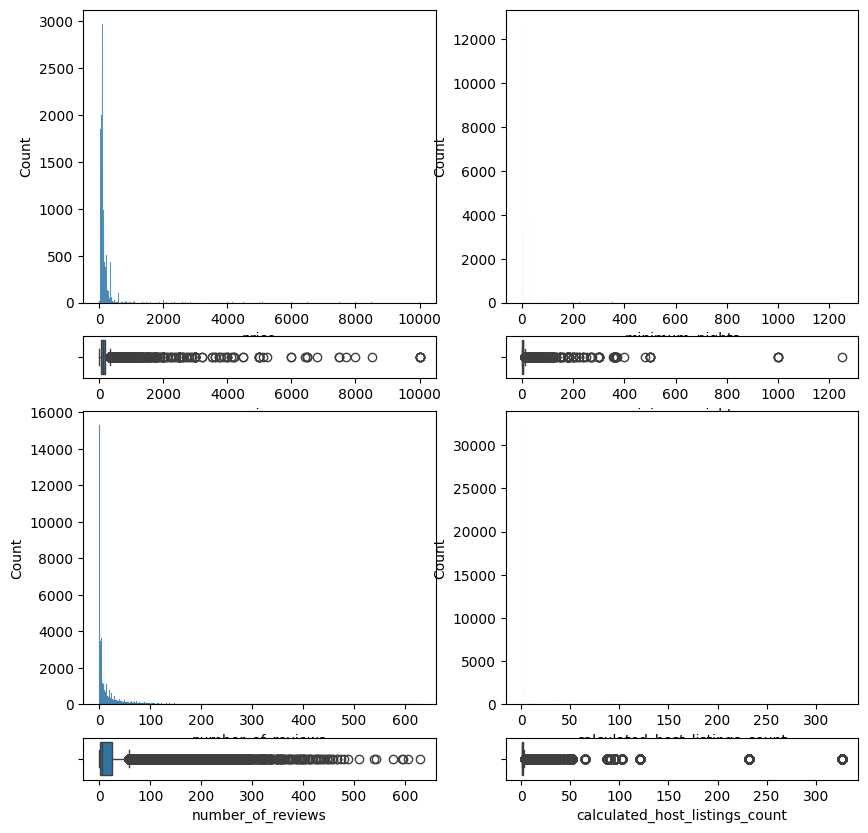

In [16]:
#analisis de las numericas
#tenemos precio, nnumero de noches, numero de reviews y hostlistingcount
#tengo 4 variables, debo hacer 4 graficos.
#como son numericas las variables, hago un histograma en conjunto con cajas y bigotes
#necesito 8 subplots, 2 de cada variable.

fig, axis = plt.subplots(4,2, figsize=(10,10), gridspec_kw={"height_ratios":[7,1,7,1]})
sns.histplot(ax=axis[0,0],data=df,x="price")
sns.boxplot(ax=axis[1,0],data=df,x="price")
sns.histplot(ax=axis[0,1],data=df,x="minimum_nights")
sns.boxplot(ax=axis[1,1],data=df,x="minimum_nights")
sns.histplot(ax=axis[2,0],data=df,x="number_of_reviews")
sns.boxplot(ax=axis[3,0],data=df,x="number_of_reviews")
sns.histplot(ax=axis[2,1],data=df,x="calculated_host_listings_count")
sns.boxplot(ax=axis[3,1],data=df,x="calculated_host_listings_count")
plt.show()

<Axes: >

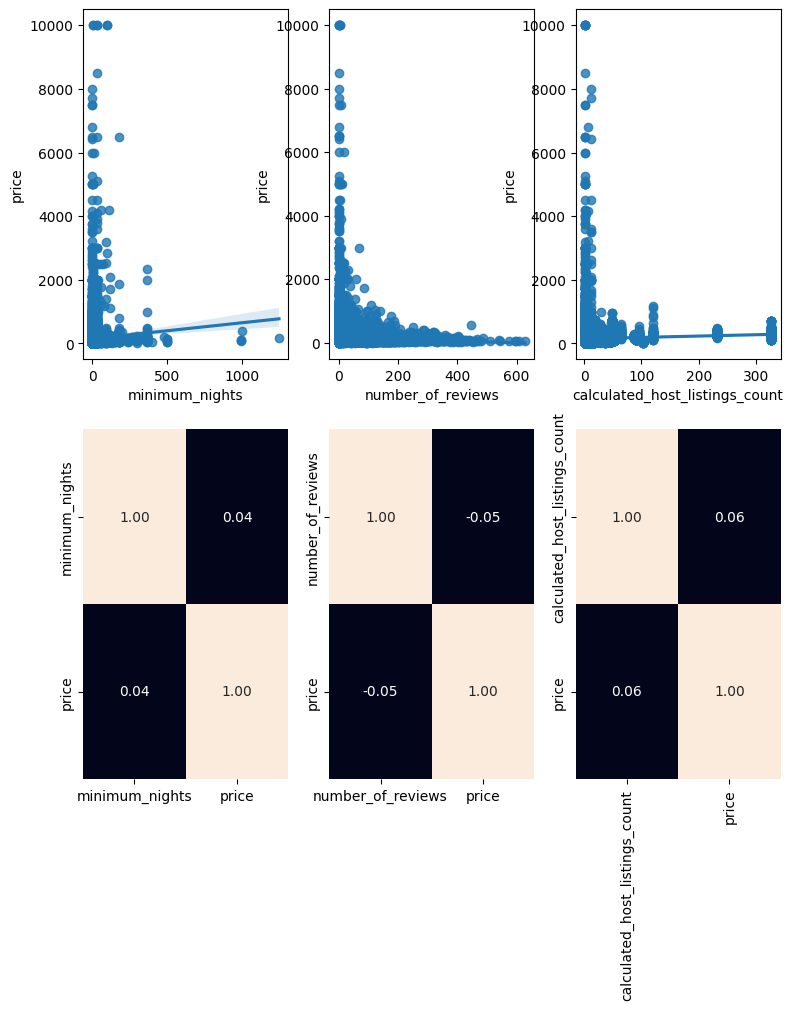

In [20]:
#Paso 4, análisis multivariante
#primero el numerico-numerico,
#que lo analizamos con un scatter y un mapa de relacion
#relaciono la variable objetivo con las no objetivo
#la objetivo es precio. tengo 3 que no son precio contra el precio 
#por lo tanto haré 6 graficos. cada uno de esos 3 comparados con la variable objetivo.
#regplot es un grafico de dispersion mas linea de regresion
fig, axis = plt.subplots(2,3,figsize=(9,10))
sns.regplot(ax=axis[0,0],data=df,x="minimum_nights", y="price")
sns.heatmap(df[["minimum_nights","price"]].corr(),fmt=".2f",ax=axis[1,0],cbar=False,annot=True)

sns.regplot(ax=axis[0,1],data=df,x="number_of_reviews", y="price")
sns.heatmap(df[["number_of_reviews","price"]].corr(),fmt=".2f",ax=axis[1,1],cbar=False,annot=True)

sns.regplot(ax=axis[0,2],data=df,x="calculated_host_listings_count", y="price")
sns.heatmap(df[["calculated_host_listings_count","price"]].corr(),fmt=".2f",ax=axis[1,2],cbar=False,annot=True)